In [0]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM

In [0]:
mnist = tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test) =mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [0]:
x_train = x_train/255.0
x_test= x_test/255.0

In [0]:
x_train.shape

(60000, 28, 28)

In [0]:
model = Sequential()

model.add(LSTM(128,input_shape=(x_train.shape[1:]),return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(128))
model.add(Dropout(0.2))

model.add(Dense(32,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(10,activation='softmax'))

In [0]:
opt = tf.keras.optimizers.Adam(lr=1e-3,decay = 1e-5)

In [0]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [0]:
model.fit(x_train,y_train,epochs=3,validation_data=(x_test,y_test))

Epoch 1/3
1875/1875 [==============================] - 12s 6ms/step - loss: 0.4123 - accuracy: 0.8756 - val_loss: 0.1021 - val_accuracy: 0.9696
Epoch 2/3
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1228 - accuracy: 0.9676 - val_loss: 0.0797 - val_accuracy: 0.9779
Epoch 3/3
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0874 - accuracy: 0.9770 - val_loss: 0.0624 - val_accuracy: 0.9819


In [0]:
model.fit(x_train,y_train,epochs=2,validation_data=(x_test,y_test))

Epoch 1/2
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0699 - accuracy: 0.9812 - val_loss: 0.0598 - val_accuracy: 0.9816
Epoch 2/2
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0553 - accuracy: 0.9850 - val_loss: 0.0475 - val_accuracy: 0.9873


In [0]:
model.fit(x_train,y_train,epochs=2,validation_data=(x_test,y_test))

Epoch 1/2
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0531 - accuracy: 0.9860 - val_loss: 0.0423 - val_accuracy: 0.9880
Epoch 2/2
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0423 - accuracy: 0.9887 - val_loss: 0.0495 - val_accuracy: 0.9885


In [0]:
model.save('rnn-mnist-2.model')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: rnn-mnist-2.model/assets


In [0]:
new_model = tf.keras.models.load_model('rnn-mnist-2.model')

In [0]:
predictions = new_model.predict(x_test)

In [0]:
predictions.shape

(10000, 10)

In [0]:
import numpy as np
import matplotlib.pyplot as plt


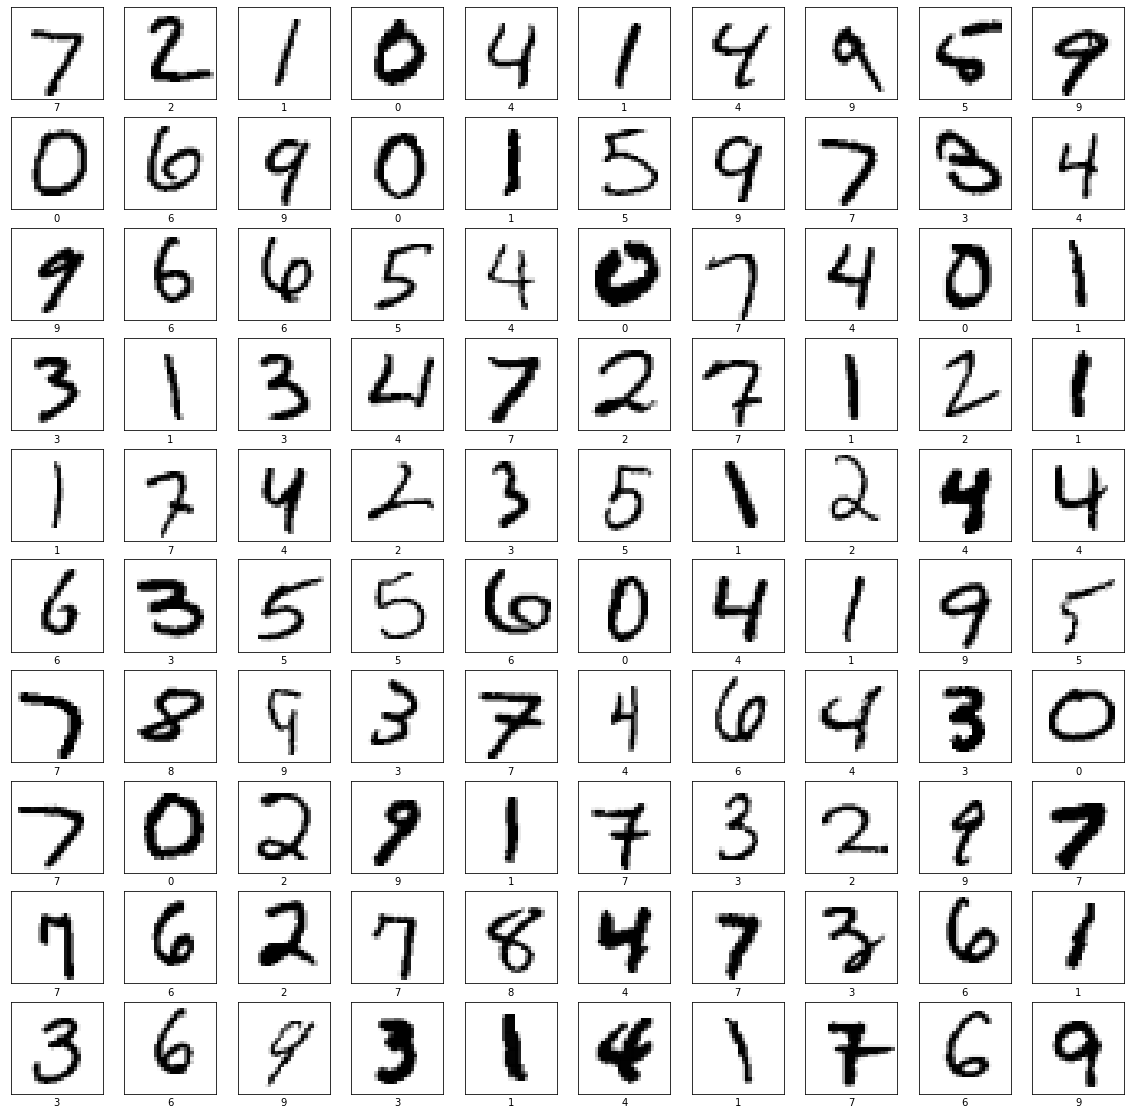

In [0]:
plt.figure(figsize=(20,20))
for i in range(100):
  plt.subplot(10,10,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(x_test[i],cmap = plt.cm.binary)
  plt.xlabel(np.argmax(predictions[i]))

In [0]:
!zip /content/ rnn-mnist-2.model

  adding: rnn-mnist-2.model/ (stored 0%)


In [0]:
!zip -r mnist.zip /content/rnn-mnist-2.model/

  adding: content/rnn-mnist-2.model/ (stored 0%)
  adding: content/rnn-mnist-2.model/variables/ (stored 0%)
  adding: content/rnn-mnist-2.model/variables/variables.data-00000-of-00002 (deflated 80%)
  adding: content/rnn-mnist-2.model/variables/variables.index (deflated 67%)
  adding: content/rnn-mnist-2.model/variables/variables.data-00001-of-00002 (deflated 7%)
  adding: content/rnn-mnist-2.model/saved_model.pb (deflated 91%)
  adding: content/rnn-mnist-2.model/assets/ (stored 0%)
